In [15]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [31]:
df_input = pd.read_csv('current density 180℃ 0.4-0.9V_std', usecols=[1,2,3])

In [32]:
df_output = pd. read_csv('current density 180℃ 0.4-0.9V_std', usecols=[4])

In [33]:
df_input.shape

(13002, 3)

In [34]:
df_output.shape

(13002, 1)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=0)

In [36]:
print(x_train.shape,x_test.shape)

(11701, 3) (1301, 3)


In [37]:
x_train

,x座標,y座標,V[V]
8980,0.913067,0.898794,0.702301
8464,0.976629,0.814851,0.702301
600,1.595340,0.594697,-1.792252
11928,1.168179,-0.755643,1.325939
1817,-1.370605,-1.188533,-1.168614
...,...,...,...
4859,1.043657,-0.143180,-0.233157
3264,-0.773090,0.284882,-0.856795
9845,-0.500180,-0.764206,1.014120
10799,-1.575116,1.220780,1.014120


In [38]:
y_train

,i[A/m^2]
8980,-0.619500
8464,-0.804112
600,2.158022
11928,-1.220325
1817,1.629995
...,...
4859,-0.122709
3264,1.125626
9845,-1.023851
10799,-0.896908


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers, initializers

weights = [com.get_weights() for com in model.layers[0:]]  #重さを抽出（※始めに回すときだけ下の行と入れ替える）
model = Sequential()



model.add(Dense(units=32, input_shape=(3,), activation='tanh'))  
model.add(Dense(units=10, activation='tanh'))  #xとyが-1～1なのでtanh
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=1, activation='linear'))  #隠れ層3層でやってみる

model.compile(loss='mean_squared_error',    #出力は連続値なので平均二乗誤差
              optimizer='adam',             #とりあえずadamで
              metrics=['mse'])

In [47]:
history = model.fit(x=x_train,
                     y=y_train,
                     epochs=20,
                     batch_size=200,
                     verbose=1,
                     validation_data=(x_test, y_test))

Train on 11701 samples, validate on 1301 samples
Epoch 1/20
11701/11701 [==============================] - 1s 54us/sample - loss: 0.2345 - mse: 0.2345 - val_loss: 0.1184 - val_mse: 0.1184
Epoch 2/20
11701/11701 [==============================] - 0s 10us/sample - loss: 0.1223 - mse: 0.1223 - val_loss: 0.1131 - val_mse: 0.1131
Epoch 3/20
11701/11701 [==============================] - 0s 10us/sample - loss: 0.1185 - mse: 0.1185 - val_loss: 0.1110 - val_mse: 0.1110
Epoch 4/20
11701/11701 [==============================] - 0s 11us/sample - loss: 0.1162 - mse: 0.1162 - val_loss: 0.1096 - val_mse: 0.1096
Epoch 5/20
11701/11701 [==============================] - 0s 10us/sample - loss: 0.1147 - mse: 0.1147 - val_loss: 0.1085 - val_mse: 0.1085
Epoch 6/20
11701/11701 [==============================] - 0s 11us/sample - loss: 0.1134 - mse: 0.1134 - val_loss: 0.1056 - val_mse: 0.1056
Epoch 7/20
11701/11701 [==============================] - 0s 11us/sample - loss: 0.1124 - mse: 0.1124 - val_loss: 0.1

In [48]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

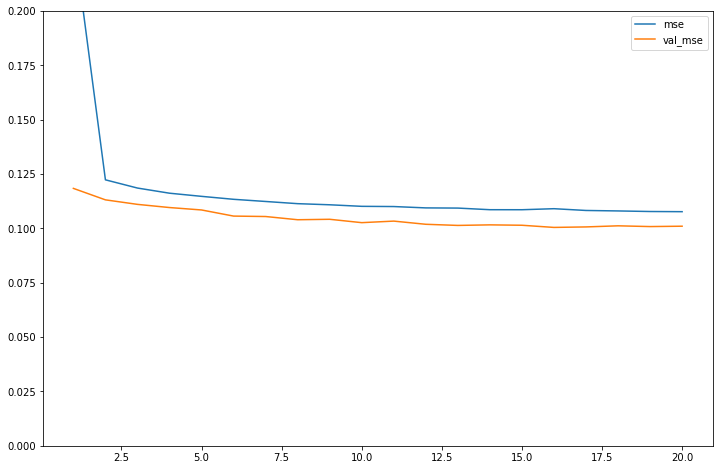

In [49]:
mse = history_dict['mse']
val_mse = history_dict['val_mse']
epochs = range(1, len(mse) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, mse, label='mse')
plt.plot(epochs, val_mse, label='val_mse')
plt.ylim((0,0.2))
plt.legend(loc = 'best')
plt.show()

In [51]:
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[2].set_weights(weights[2])

In [52]:
model.save('i_predict 180℃')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: i_predict 180℃\assets
